# BIA-652 Assignment 1. Intro to Pandas

> Indented block



Note: Please **DO NOT** share your answers with anyone, including uploading to Github, Course Hero, etc. 

### Your Name: 

In [31]:
import numpy as np #numerical computation
import pandas as pd #processing dataframes

Use the `RegularSeasonCompactResults` data to answer the following questions:  

In [32]:
# Download example data set
import urllib.request
from zipfile import ZipFile

urllib.request.urlretrieve("http://fengmai.net/download/data/bia652/pandas_data.zip", 
                           "pandas_data.zip")
ZipFile("pandas_data.zip").extractall()
df = pd.read_csv('data/RegularSeasonCompactResults.csv')

__Q1: Create a new column `total_score` as the sum of Wscore and Lscore.__ 

In [33]:
df['Total_Score'] = df['Wscore'] + df['Lscore']

In [34]:
df.head()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot,Total_Score
0,1985,20,1228,81,1328,64,N,0,145
1,1985,25,1106,77,1354,70,H,0,147
2,1985,25,1112,63,1223,56,H,0,119
3,1985,25,1165,70,1432,54,H,0,124
4,1985,25,1192,86,1447,74,H,0,160


__Q2: What is the min, max, average, and median of the total_score?__ 

In [35]:
df['Total_Score'].min()

62

In [36]:
df['Total_Score'].max()

331

In [37]:
df['Total_Score'].mean()

141.0973301488757

In [38]:
df['Total_Score'].median()

140.0

__Q3: Find the average total score for each year (season).__ 

In [39]:
df.groupby(['Season'])[['Total_Score']].mean().head()

,Total_Score
Season,
1985,138.583356
1986,138.447528
1987,144.764496
1988,147.470796
1989,151.259351


__Q4: Plot a time series plot of average total score by year (season)__ 

Hint: search Google for: how to plot a pandas series or [read the user guide](https://pandas.pydata.org/docs/user_guide/visualization.html)


In [40]:
import matplotlib.pyplot as plt

In [41]:
plt.close("all")

In [42]:
ts = df.groupby(['Season'])[['Total_Score']].mean()

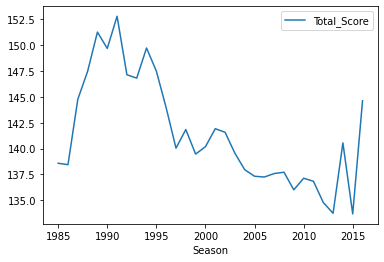

In [43]:
ts.plot();

__Q5: Which year has the highest percentage of blowout games, which is defined as a winning margin of at least 30 points?__ 



In [44]:
df['Margin'] = df['Wscore'] - df['Lscore']

In [45]:
df['Blowout'] = df['Margin'] >= 30

In [46]:
df.groupby(['Season']) [['Blowout']].mean().idxmax()

Blowout    1991
dtype: int64

In [47]:
def percentage(x):
  return 100* (df.count(Blowout='Ture')/df.count(Blowout))

**Q6: For each team and season combination,   
a) find the average number of points scored by the team per game in each season;  
b) plot the average points scored by team 1461 by year.**

Hint: This requires you to consider both the case when the team won (Wscore) and when the team lost (Lscore).  
Your answer for each team-year combination should be between Wscore_when_winning and Lscore_when_losing in the last dataframe of the tutorial. 

Q6 a):

In [48]:
df.sort_values (['Season','Wteam'])

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot,Total_Score,Margin,Blowout
137,1985,32,1102,78,1225,67,A,0,145,11,False
407,1985,40,1102,85,1109,56,H,0,141,29,False
3096,1985,115,1102,52,1461,49,A,0,101,3,False
3157,1985,117,1102,58,1218,54,H,0,112,4,False
3563,1985,126,1102,82,1140,79,A,0,161,3,False
...,...,...,...,...,...,...,...,...,...,...,...
142446,2016,68,1464,103,1453,93,H,0,196,10,False
143114,2016,83,1464,70,1156,55,A,0,125,15,False
143271,2016,87,1464,82,1227,78,A,0,160,4,False
144171,2016,106,1464,92,1227,91,H,2,183,1,False


In [49]:
df.melt(id_vars=['Season','Daynum','Wteam','Lteam'], value_vars=['Wscore', 'Lscore'], var_name='W or L', value_name= 'Score')

,Season,Daynum,Wteam,Lteam,W or L,Score
0,1985,20,1228,1328,Wscore,81
1,1985,25,1106,1354,Wscore,77
2,1985,25,1112,1223,Wscore,63
3,1985,25,1165,1432,Wscore,70
4,1985,25,1192,1447,Wscore,86
...,...,...,...,...,...,...
290573,2016,132,1114,1419,Lscore,50
290574,2016,132,1163,1272,Lscore,58
290575,2016,132,1246,1401,Lscore,77
290576,2016,132,1277,1345,Lscore,62


In [50]:
df1= df[['Season','Wteam','Wscore']].rename(columns = {'Wteam':'Team', 'Wscore':'Score'})
df2= df[['Season','Lteam','Lscore']].rename(columns = {'Lteam':'Team', 'Lscore':'Score'})

In [51]:
df_final = pd.concat([df1,df2], axis=0)

In [52]:
df_final

,Season,Team,Score
0,1985,1228,81
1,1985,1106,77
2,1985,1112,63
3,1985,1165,70
4,1985,1192,86
...,...,...,...
145284,2016,1419,50
145285,2016,1272,58
145286,2016,1401,77
145287,2016,1345,62


In [53]:
df_final.groupby(['Season','Team'])[['Score']].mean()

Score
Season Team           
1985   1102  63.083333
       1103  61.043478
       1104  68.500000
       1106  71.625000
       1108  83.000000
...                ...
2016   1460  68.636364
       1461  70.333333
       1462  81.343750
       1463  74.481481
       1464  75.633333

[10186 rows x 1 columns]

Q6 b):

In [54]:
df_final.groupby(['Season','Team'])[['Score']].mean().reset_index()

,Season,Team,Score
0,1985,1102,63.083333
1,1985,1103,61.043478
2,1985,1104,68.500000
3,1985,1106,71.625000
4,1985,1108,83.000000
...,...,...,...
10181,2016,1460,68.636364
10182,2016,1461,70.333333
10183,2016,1462,81.343750
10184,2016,1463,74.481481


In [55]:
df_final.query('Team == "1461"')

,Season,Team,Score
382,1985,1461,73
606,1985,1461,72
688,1985,1461,51
807,1985,1461,60
991,1985,1461,86
...,...,...,...
143963,2016,1461,71
144184,2016,1461,75
144534,2016,1461,61
144742,2016,1461,74


In [56]:
y = df_final.query('Team == "1461"')

In [57]:
y

,Season,Team,Score
382,1985,1461,73
606,1985,1461,72
688,1985,1461,51
807,1985,1461,60
991,1985,1461,86
...,...,...,...
143963,2016,1461,71
144184,2016,1461,75
144534,2016,1461,61
144742,2016,1461,74


In [58]:
y.groupby('Season')['Score'].mean()

Season
1985    63.576923
1986    68.586207
1987    70.500000
1988    75.866667
1989    72.806452
1990    72.000000
1991    82.666667
1992    73.250000
1993    67.884615
1994    69.148148
1995    64.730769
1996    71.961538
1997    71.851852
1998    63.769231
1999    82.038462
2000    81.900000
2001    76.285714
2002    75.214286
2003    72.896552
2004    69.964286
2005    70.928571
2006    66.000000
2007    73.806452
2008    68.142857
2009    73.466667
2010    67.137931
2011    64.551724
2012    62.379310
2013    60.133333
2014    64.633333
2015    61.437500
2016    70.333333
Name: Score, dtype: float64

In [59]:
z=y.groupby('Season')['Score'].mean()

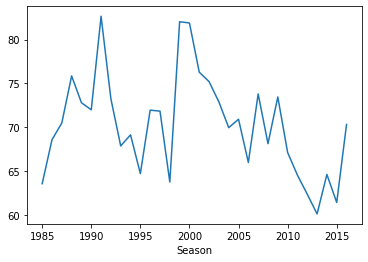

In [60]:
z.plot()